<link href="https://fonts.googleapis.com/css2?family=Nunito&display=swap" rel="stylesheet">

<div style="background-color:white; text-align:center; padding:30px; font-family: 'Nunito', sans-serif;">
    <h2 style="color:black; margin-bottom: 5px;"><strong>EcoSage</strong></h2>
    <h3 style="color:gray; font-weight:normal; margin-top: 0;">LLM‑Powered Chatbot for Sustainable Policy</h3>
    <table style="margin: 20px auto 0; border-collapse: collapse; width: 60%; font-family: 'Nunito', sans-serif; font-size: 16px;">
        <thead>
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 12px; border-bottom: 1px solid #ddd; text-align: center;">Name</th>
                <th style="padding: 12px; border-bottom: 1px solid #ddd; text-align: center;">GitHub Username</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Vince Ammerlaan</td>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Vince16270</td>
            </tr>
            <tr style="background-color: #f9f9f9;">
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Tommi Lander</td>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Tommi7</td>
            </tr>
            <tr>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Nima Ghafar</td>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">NimaGhafar</td>
            </tr>
            <tr style="background-color: #f9f9f9;">
                <td style="padding: 10px; text-align: center;">Jort Akershoek</td>
                <td style="padding: 10px; text-align: center;">JortAkershoek</td>
            </tr>
        </tbody>
    </table>

</div>

<div style="display: flex; justify-content: center; align-items: center; margin-top:20px;">
    <img src="https://static.vecteezy.com/system/resources/previews/017/306/579/original/esg-sustainability-concept-illustration-vector.jpg" alt="genres" style="width: 600px; height: auto;">
</div>

- Client: Mathis Mourey 
- Instructors: Mirabai Vosteen and Beata Skuczynska
- Date: ..-06-2025

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Table of contents </strong></h2>
</div>
<ul style="padding: 0; list-style: none;">
    <li style="text-align: center;"><a href="#1.0">Chapter 1: The Project</a></li>
    <li style="text-align: center;"><a href="#1.0">Chapter 2: Loading Packages, Self-defined functions and the Data</a></li>
    <li style="text-align: center;"><a href="#2.0">Chapter 3: Exploratory Data Analysis</a></li>
    <li style="text-align: center;"><a href="#3.0">Chapter 4: Data Preprocessing</a></li>
    <li style="text-align: center;"><a href="#6.0">Chapter 5: The Model</a></li>
    <li style="text-align: center;"><a href="#5.0">Chapter 6: Testing the model</a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 7: Evaluating the model</a></li>
    <li style="text-align: center;"><a href="#7.0">Chapter 8: Results and Conclusions</a></li>
    <li style="text-align: center;"><a href="#8.0">Chapter 9: Sources</a></li>
</ul>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 1: The Project </strong></h2>

</ul>

In this project, we focus on improving the accessibility of policy information related to the energy transition. Governments across Europe and the Netherlands publish numerous policy documents, regulations, and reports to support the shift toward renewable energy sources. These documents are often technical, extensive, and written in academic or legal language, making it difficult for citizens to understand their content. As a result, they miss out on important information about subsidies, regulations, or their own role in the energy transition.

To address this problem, we are developing a chatbot powered by a Large Language Model (LLM). This chatbot is capable of automatically analyzing, summarizing, and translating government documents into plain and understandable language. Users can ask questions through a simple interface, and the chatbot provides clear answers based on factual information.

Our approach consists of collecting policy documents in PDF format, preprocessing the texts using NLP techniques such as tokenization and filtering, and leveraging a powerful pretrained LLM for text processing. Instead of training a model from scratch, we utilize a pretrained model and Retrieval-Augmented Generation (RAG) to generate relevant answers. The generated responses are evaluated based on their clarity, relevance, and reliability.

With this tool, we aim to contribute to a better-informed society in which citizens have easy access to simplified yet essential information. In doing so, we not only increase public engagement in the energy transition, but also strengthen support for sustainable policy.

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 2: Loading Packages, Self-defined functions and the Data</strong></h2>

</ul>

**Packages**

- This section of the notebook covers the necessary Python packages required for our deep learning models. Below is a list of the key packages used

In [ ]:
import os
import re
import math
import nltk
import json
import torch
import faiss
import string
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelForCausalLM
from accelerate import init_empty_weights, load_checkpoint_and_dispatch

**Self defined functions**

- This section contains our self defined functions that are essential for our project. These functions are written to streamline repetitive tasks and enhance code readability.

In [2]:
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None

In [3]:
def count_stopwords(text):
    words = text.split()
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

In [4]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'[^\w\s.,!?]', '', text)
    text = text.strip()
    return text

In [5]:
def chunk_text(text, max_tokens, tokenizer):
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i + max_tokens]
        chunks.append(tokenizer.convert_tokens_to_string(chunk))
    return chunks

**Loading the text from the PDF files**

- Here we load the text from the different PDF files into text format.

In [6]:
pdf_dir = os.path.join("..", "data")

data = []
for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        text = extract_text_from_pdf(file_path)
        if text:
            data.append({"file_name": file_name, "text": text})

df = pd.DataFrame(data)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 3: Exploratory Data Analysis </strong></h2>
</div>

**Basic Information**

In this section, we perform Exploratory Data Analysis (EDA). We check how many PDF files we have and look at different statistics. We also create word clouds and apply LDA to find topic groups. This helps us understand the structure of the data, discover patterns, and spot any unusual values.

In [7]:
print("Number of PDF files processed:", len(df))
print("Sample data:")
print(df.head())

Number of PDF files processed: 15
Sample data:
                                           file_name  \
0  Action for more affordable, secure and sustain...   
1            the energy performance of buildings.pdf   
2  reducing our dependence on Russian fossil fuel...   
3                  Beleidskader energietransitie.pdf   
4     informatiebehoefte rondom energietransitie.pdf   

                                                text  
0   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  
1  DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...  
2   \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...  
3  Aanvulling  op het Beleidsk ader  ener gietr a...  
4                                     Rapportage ...  


**Stopwoord-analysis**

In this section, we calculate text-related statistics for each PDF to help analyze the documents better.

- `word_count`: Counts the total number of words in the text.
- `stopword_count`: Counts how many of those words are stopwords (like: *de, het, en, the, and*).
- `stopword_percentage`: Calculates what percentage of the total words are stopwords.
- `text_length`: Counts the number of characters in the text.
- `no_stopwords`: Creates a version of the text with all stopwords removed. This is useful for clean wordclouds and topic modeling.

In [8]:
nltk.download('stopwords')

custom_stopwords = {
    'De', 'e', 'uitgangspunt', 'geplaatst', 'bijlage', 'en', 'Voor', 'bijvoorbeeld', 'Een', 
    'Article', 'Ik', 'wel', 'vragen', 'mensen', 'klanten', 'waarom', 'alleen', 'willen', 
    'niet', 'Ze', 'including', 'medewerker', 'Het', 'vaak', 'geven', 'zien', 'Dat', 'komt', 
    'gewoon', 'producten', 'Atlas', 'TrueTalk', 'Wat', 'nodig', 'per', 'zie figuur', 
    'Ook', 'minder', 'Daarnaast', 'weten', 'wij', 'waar', 'Deze', 'Dit',
    'Al', 'verschillende', 'zoals', 'doen', 'gaan', 'moeten', 'heel', 'mogelijk'} 

stop_words = set(stopwords.words('english')) | set(stopwords.words('dutch')) | custom_stopwords

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['stopword_count'] = df['text'].apply(count_stopwords)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['stopword_percentage'] = df['stopword_count'] / df['word_count'] * 100
df['text_length'] = df['text'].apply(len)
df['no_stopwords'] = df['text'].apply(remove_stopwords)

display(df)

[nltk_data] Downloading package stopwords to /Users/vince/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file_name  \
0   Action for more affordable, secure and sustain...   
1             the energy performance of buildings.pdf   
2   reducing our dependence on Russian fossil fuel...   
3                   Beleidskader energietransitie.pdf   
4      informatiebehoefte rondom energietransitie.pdf   
5                    Maatregelen energietransitie.pdf   
6                            on energy efficiency.pdf   
7                    CV-monteurs energietransitie.pdf   
8                 laagdrempelige energietransitie.pdf   
9   focusgroepen bouwmarktmedewerkers energietrans...   
10  promotion of the use of energy from renewable ...   
11  the first phase of the establishment of a comm...   
12  the promotion of energy from renewable sources...   
13             establishing a Social Climate Fund.pdf   
14  common rules for the internal market for elect...   

                                                 text  word_count  \
0    \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        4902   
1   DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...       39342   
2    \nEN   EN \n \n \n EUROPEAN  \nCOMMISSION   \...        9221   
3   Aanvulling  op het Beleidsk ader  ener gietr a...        3449   
4                                      Rapportage ...        6118   
5   Inhoud \nIntroductie maatregelen ................        2986   
6   I\n(Legislative acts)\nDIRECTIVES\nDIRECTIVE (...       58299   
7    \n1 \n \n \n \n \n \n \n \n \n \n \n \n \n \n...        9926   
8      \n  \n \n \n \n \nEen Laagdrempelige Energi...       23020   
9    1  \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...        8029   
10  DIRECTIVES \nDIRECTIVE (EU) 2018/2001 OF THE E...       69423   
11  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...        6181   
12  ELI: http://data.europa.eu/eli/dir/2023/2413/o...       51603   
13  I\n(Legislative acts)\nREGUL ATIONS\nREGUL ATI...       27183   
14  DIRECTIVES \nDIRECTIVE (EU) 2019/944 OF THE EU...       48925   

    stopword_count  stopword_percentage  text_length  \
0             1707            34.822521        31713   
1            13434            34.146713       249066   
2             3281            35.581824        61198   
3             1424            41.287330        24445   
4             3043            49.738477        39448   
5             1276            42.732753        23976   
6            20736            35.568363       388256   
7             4841            48.770905        61660   
8             9154            39.765421       155848   
9             4180            52.061278        51182   
10           22668            32.652003       410355   
11            2181            35.285552        40383   
12           18965            36.751739       317288   
13           10277            37.806717       168580   
14           18114            37.024016       297304   

                                         no_stopwords  
0   EN EN EUROPEAN COMMISSION Strasbourg, 8.3.2022...  
1   DIRECTIVE (EU) 2024/1275 OF THE EUR OPEAN PARL...  
2   EN EN EUROPEAN COMMISSION Brussels, 18.5.2022 ...  
3   Aanvulling Beleidsk ader ener gietr ansitie ra...  
4   Rapportage energiebehoefte burgers rondom ener...  
5   Inhoud Introductie maatregelen ..................  
6   I (Legislative acts) DIRECTIVES DIRECTIVE (EU)...  
7   1 CV MONTEURS EN DE ENERGIETRANSITIE verslagle...  
8   Laagdrempelige Energietransitie Hoe haalbaarhe...  
9   1 Bouwmarktmedewerkers energietransitie versla...  
10  DIRECTIVES DIRECTIVE (EU) 2018/2001 OF THE EUR...  
11  COMMISSION DELEGATED REGUL ATION (EU) 2024/136...  
12  ELI: http://data.europa.eu/eli/dir/2023/2413/o...  
13  I (Legislative acts) REGUL ATIONS REGUL ATION ...  
14  DIRECTIVES DIRECTIVE (EU) 2019/944 OF THE EUR ...

**Text lengths**

- In this section, we check the lengths of the different PDF's. The text length is the amount letters used in a PDF.

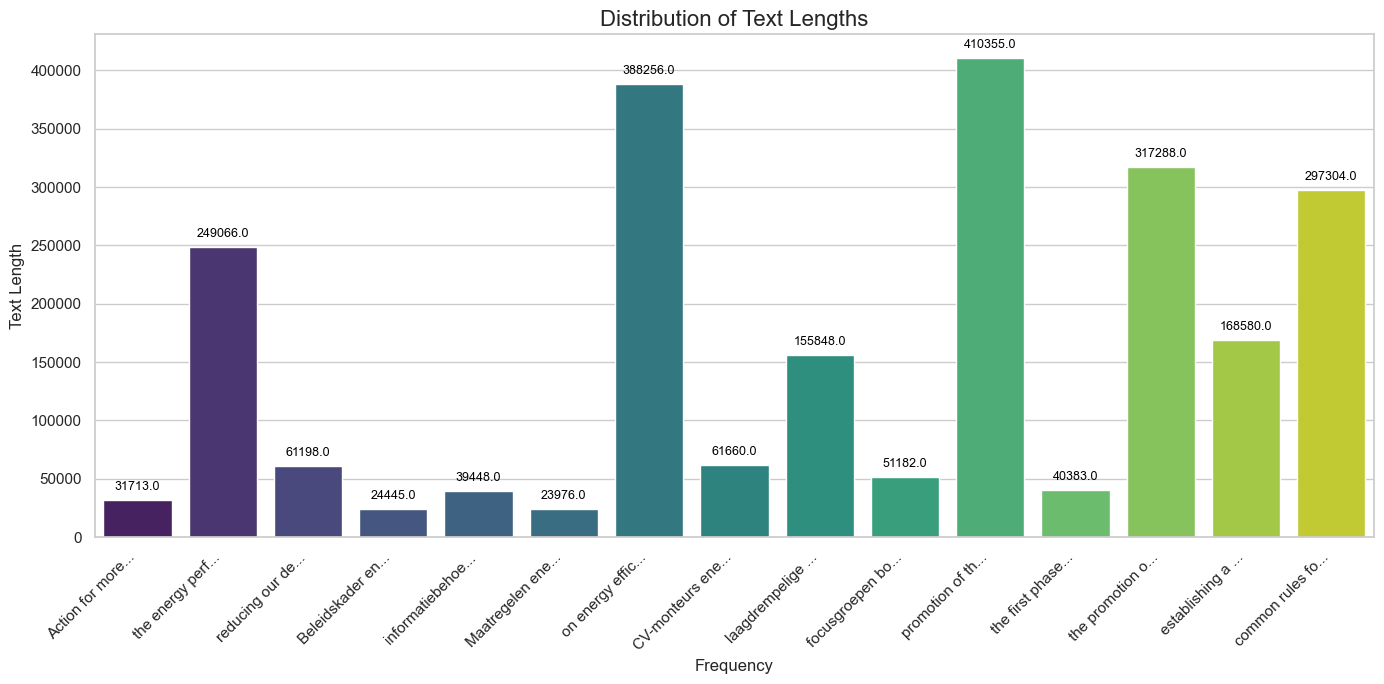

In [9]:
df_plot = df.copy()

df_plot['short_file_name'] = df_plot['file_name'].apply(lambda x: x[:15] + '...' if len(x) > 15 else x)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='short_file_name', y='text_length', data=df_plot, palette='viridis')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Text Lengths', fontsize=16)
plt.ylabel('Text Length', fontsize=12)
plt.xlabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**Stop words for each PDF file**

- In this section, we check the percentage of the stopwords for each PDF.

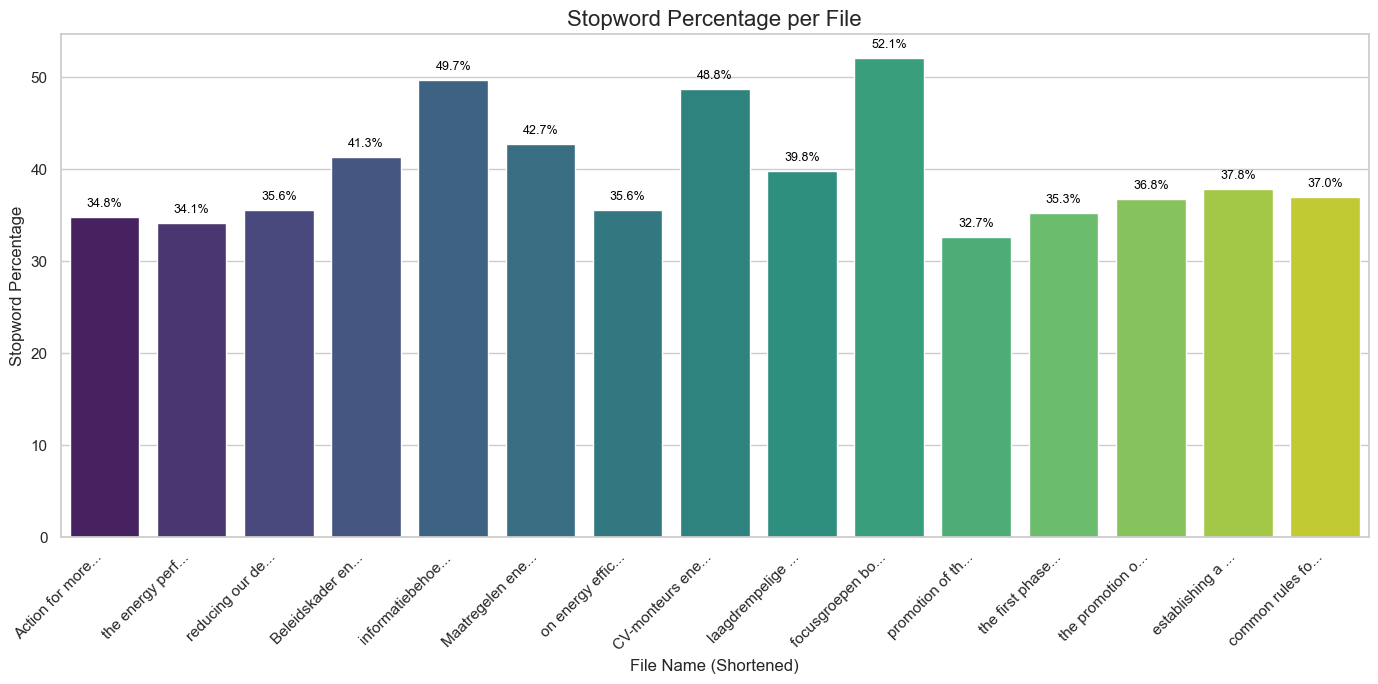

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='short_file_name', y='stopword_percentage', data=df_plot, palette='viridis')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Stopword Percentage per File', fontsize=16)
plt.ylabel('Stopword Percentage', fontsize=12)
plt.xlabel('File Name (Shortened)', fontsize=12)

plt.tight_layout()
plt.show()

**Word cloud**

- In this section, we check the word clouds. In the word clouds you can see which word is used the most and gives us a better insight in the PDF's.

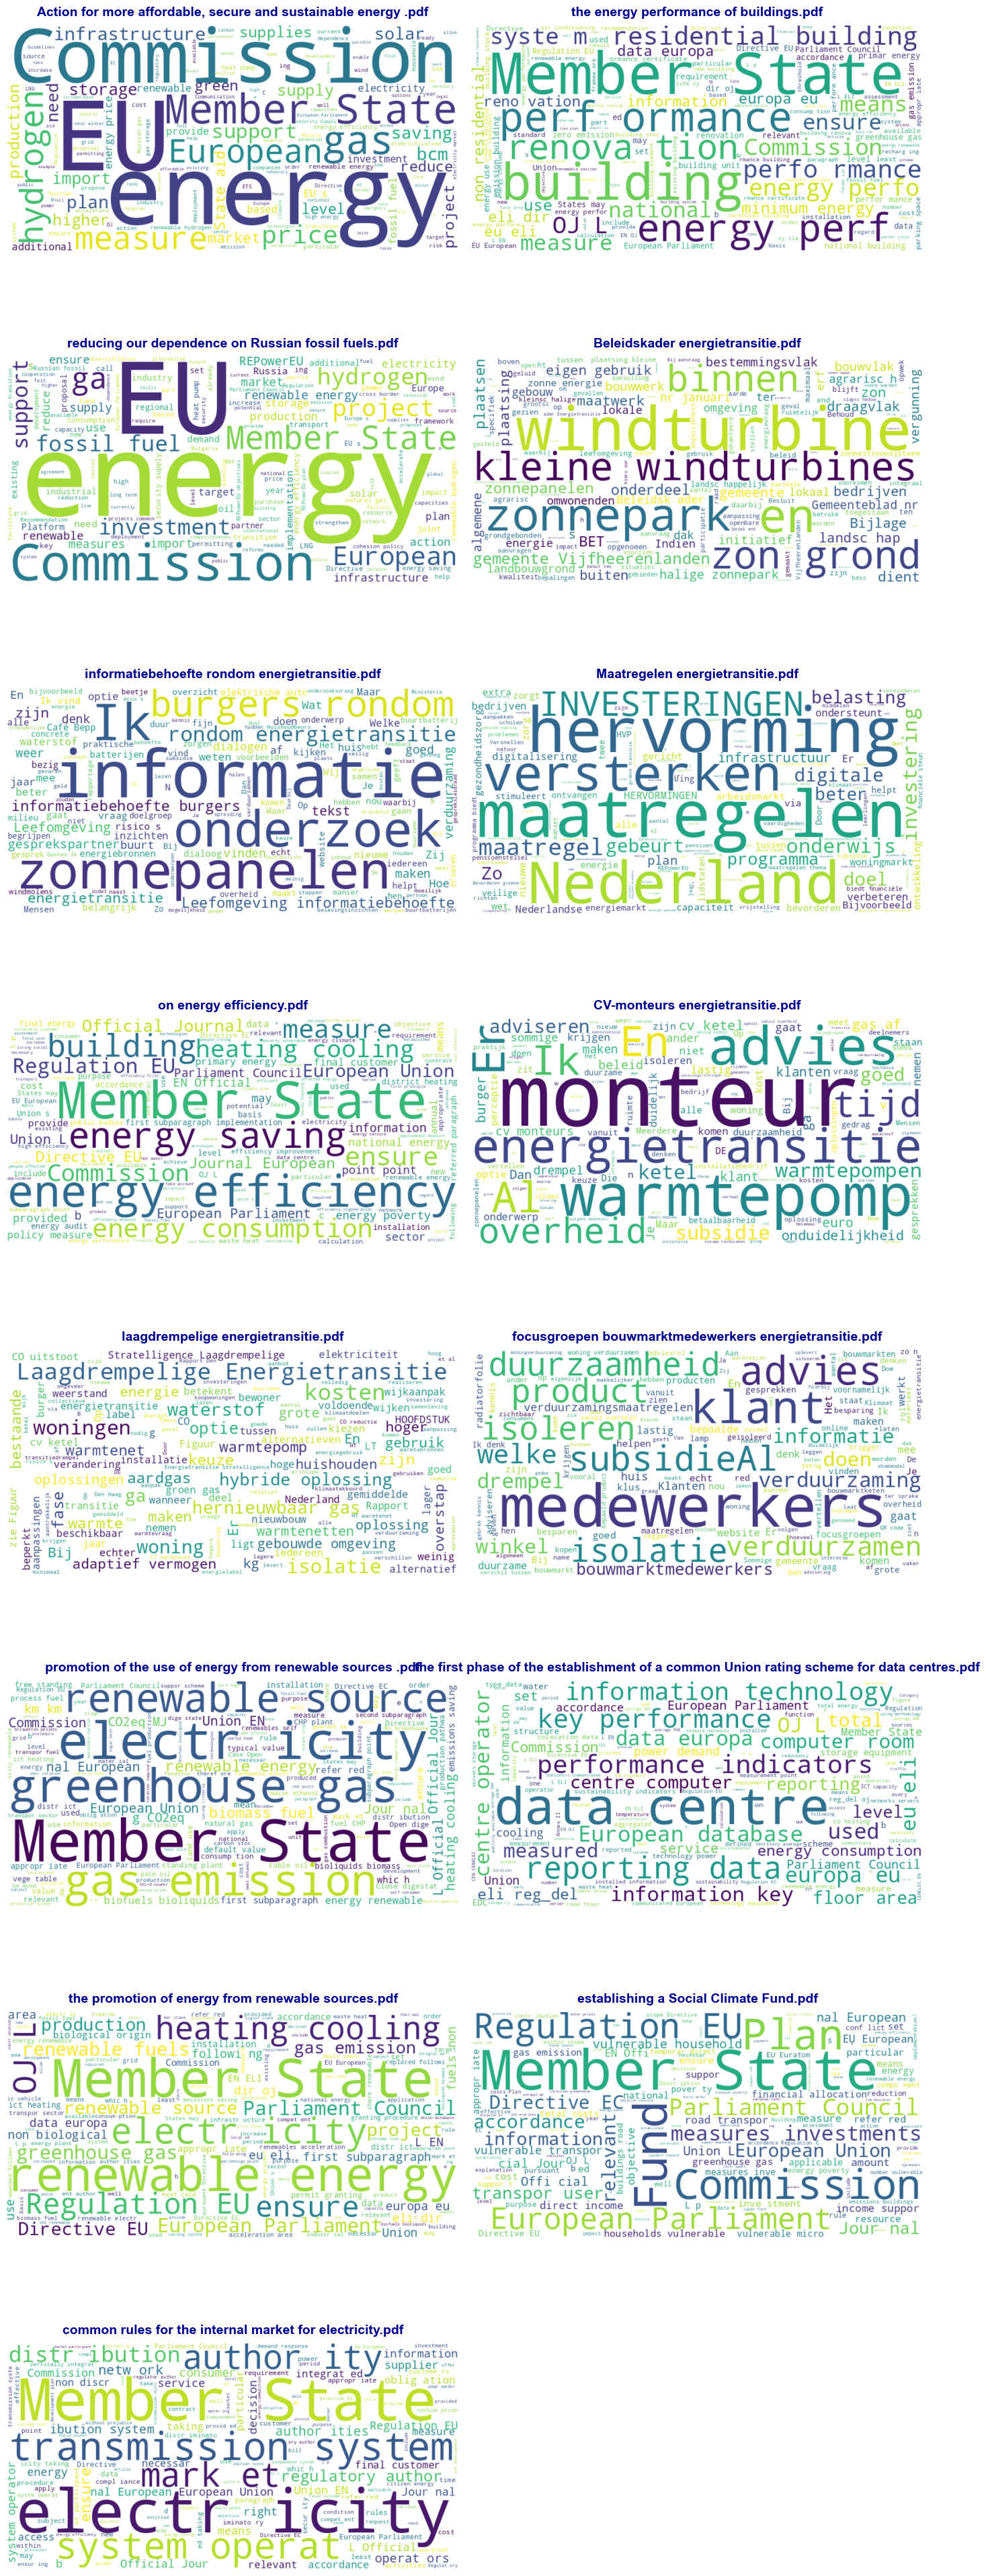

In [ ]:
cols = 2
rows = math.ceil(len(df) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()  

for idx, (i, row) in enumerate(df.iterrows()):
    ax = axes[idx]

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis",
        max_words=150,
        contour_color='black',
        contour_width=1.5
    ).generate(row['no_stopwords'])

    ax.imshow(wc, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"{row['file_name']}", fontsize=14, fontweight='bold', color='darkblue', pad=10)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 4: Data Preprocessing </strong></h2>
</div>

We save the DataFrame for further processing

In [ ]:
output_path = "processed_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}")

Processed data saved to processed_data.csv


We remove strange characters and unnecessary whitespace. Many policy documents contain unusual characters or formatting. Cleaning the input improves chunking and embedding quality.

After that, we split long texts into smaller pieces (chunks) of up to max_tokens tokens, so they fit within the context window of a language model.
Many LLMs have token limits, and chunking ensures we stay within those boundaries.

Blog, D. C. (2025, February 27). 5 Approaches to solve LLM token Limits | DeepChecks. Deepchecks. https://www.deepchecks.com/5-approaches-to-solve-llm-token-limits/

We load a tokenizer (GPT-2 in this case) and set the maximum number of tokens per chunk.

In [14]:
tokenizer_name = "gpt2"  
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
max_tokens = 512

We apply _clean_text_ and _chunk_text_ to each row in the DataFrame.

After that, we save all chunks in JSONL format, where each line represents one sample (chunk).

In [15]:
data =[]
for i, row in df.iterrows():
    text = row['text']
    text = clean_text(text)
    chunks = chunk_text(text, max_tokens, tokenizer)
    for i, chunk in enumerate(chunks):
        data.append({'file_name': row['file_name'], 'chunk_id': i, 'text': chunk})
        
if 'clean_text' not in df.columns:
    df['clean_text'] = df['text'].apply(clean_text) 

df_processed = pd.DataFrame(data)
output_path = "processed_data_chunks.json"
df_processed.to_json(output_path, orient='records', lines=True)
print(f"Processed data saved to {output_path}")

Token indices sequence length is longer than the specified maximum sequence length for this model (89707 > 1024). Running this sequence through the model will result in indexing errors


Processed data saved to processed_data_chunks.json



Topic 1: data, centre, gas, hydrogen, centres, reporting, supply, repowereu, projects, infrastructure

Topic 2: fund, suppor, transpor, vulnerable, plan, households, financial, investments, accordance, costs

Topic 3: buildings, tion, ormance, perf, renova, syste, requirements, means, heating, minimum

Topic 4: savings, consumption, heating, buildings, cooling, accordance, cogeneration, customers, electricity, official

Topic 5: electr, icity, gas, emissions, distr, greenhouse, biomass, operat, transmission, production


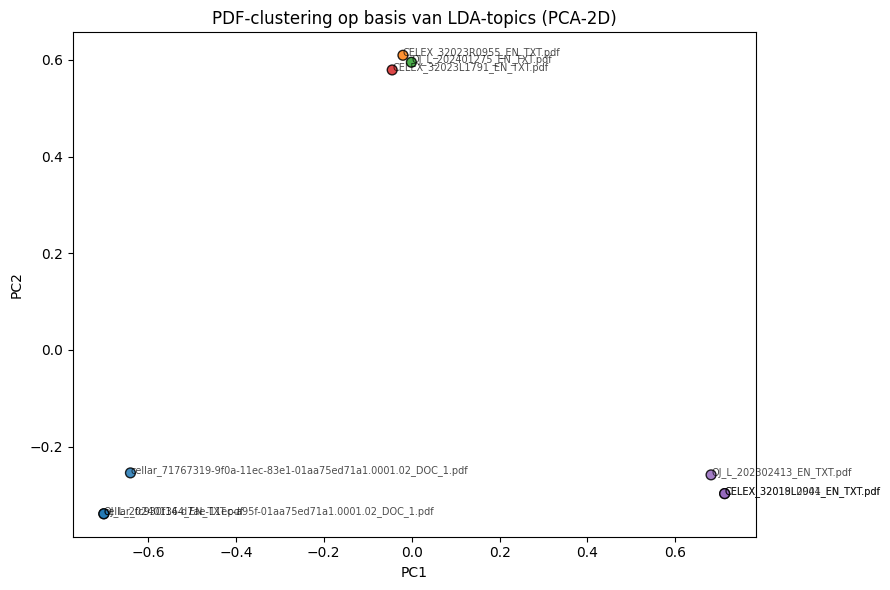

In [16]:
custom_stop = {
    'shall', 'article', 'oj', 'ed',
    'author', 'paragraph', 'subparagraph', 'referred'}

stop_words = list(ENGLISH_STOP_WORDS.union(custom_stop))

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
doc_term_matrix = vectorizer.fit_transform(df['clean_text'])   

n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method='batch'
).fit(doc_term_matrix)

def show_topics(model, fnames, topn=10):
    for i, comp in enumerate(model.components_):
        terms = ", ".join(fnames[j] for j in comp.argsort()[-topn:][::-1])
        print(f"\nTopic {i+1}: {terms}")

feature_names = vectorizer.get_feature_names_out()
show_topics(lda, feature_names)

doc_topics = lda.transform(doc_term_matrix)
coords = PCA(n_components=2, random_state=42).fit_transform(doc_topics)

dom_topic = doc_topics.argmax(axis=1)
colors = plt.cm.tab10(dom_topic)

plt.figure(figsize=(9, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=colors, s=50, alpha=0.85, edgecolors="k")

for i, fname in enumerate(df['file_name']):
    plt.annotate(fname, (coords[i, 0], coords[i, 1]), fontsize=7, alpha=0.7)

plt.title("PDF‑clustering op basis van LDA‑topics (PCA‑2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout(); plt.show()

Here, we load the chunks into a DataFrame.

In [17]:
df_chunks = pd.read_json("processed_data_chunks.json", lines=True)

print(df_chunks.head())

                     file_name  chunk_id  \
0  CELEX_32018L2001_EN_TXT.pdf         0   
1  CELEX_32018L2001_EN_TXT.pdf         1   
2  CELEX_32018L2001_EN_TXT.pdf         2   
3  CELEX_32018L2001_EN_TXT.pdf         3   
4  CELEX_32018L2001_EN_TXT.pdf         4   

                                                text  
0  DIRECTIVES DIRECTIVE EU 20182001 OF THE EUR OP...  
1   as technological and industr ial leadership w...  
2   energy policies  and of 23 June 2016 entitled...  
3   period in time where the gap occur red. Both ...  
4   clean technologies, and establish an adequate...  


We create a list of chunks containing only the text content from each JSON object. This is simple and quickly usable for embeddings.

In [18]:
with open("processed_data_chunks.json", "r") as f:
    chunks_data = [json.loads(line) for line in f]

chunks = [items['text'] for items in chunks_data]

We create embeddings from your chunks using a small, efficient model.

Why MiniLM?
- Small → runs on a CPU or regular laptop
- Fast → good enough for prototyping


sentence-transformers/all-MiniLM-L6-v2 · Hugging Face. (2024, January 5). https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [19]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
chunks_embeddings = embedding_model.encode(chunks, show_progress_bar=True)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


What does it do?
- Initializes a FAISS index for fast vector searches
- Adds chunk embeddings to the index

Why?
- FAISS enables real-time retrieval of relevant chunks for RAG (Retrieval-Augmented Generation).

In [20]:
embedding_dim = chunks_embeddings[0].shape[0]
index = faiss.IndexFlatL2(embedding_dim)
index.add(np.array(chunks_embeddings).astype('float32'))

What does it do?
1. Embeds your question
2. Retrieves the top 5 most similar chunks
3. Combines them into context for your LLM

Why?
- By providing the LLM with only relevant context, you get better answers to your questions.

Why top_k = 5?
- It’s a balance between enough context and not too many tokens. You can fine-tune this value.

In [21]:
user_question = "What is the green deal"
question_embedding = embedding_model.encode([user_question])

In [22]:
top_k = 5
_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]
context = "\n\n".join(retreived_chunks)

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 5: The Model</strong></h2>
</div>

In [23]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", device_map="auto", torch_dtype="auto")
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [24]:
user_question = "What is the green new deal?"
question_embedding = embedding_model.encode([user_question])

_, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
retreived_chunks = [chunks[i] for i in indices[0]]

context = "\n\n".join(retreived_chunks)

rag_prompt = f"""
you're an expert in european policy.
you have access to the following context:
{context}
your question is: {user_question}
answer in detail. 
"""

device = "cuda" if torch.cuda.is_available() else "cpu"
rag_input = tokenizer(rag_prompt, return_tensors="pt").to(device)
output = model.generate(**rag_input, num_return_sequences=1)

response = tokenizer.decode(output[0], skip_special_tokens=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (2367 > 512). Running this sequence through the model will result in indexing errors


In [25]:
print("Response:", response)

Response: The need for greater security of supply is adding a new impetus to the objectives of the


In [26]:
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="auto",
        torch_dtype="auto",
        low_cpu_mem_usage=True,
)
model.eval()

def generate_chat_response(chat_history, user_input, max_new_tokens=256):
     """
     chat_history: list of (speaker, text) tuples
     user_input: string containing the user’s new query
     """
     chat_history.append(("User", user_input))

     prompt_text = ""
     for role, text in chat_history:
          prompt_text += f"{role}: {text}\n"

     inputs = tokenizer(prompt_text, return_tensors="pt").to("cuda")

     output_ids = model.generate(
          **inputs,
          max_new_tokens=max_new_tokens,
          do_sample=True,        
          top_p=0.9,              
          temperature=0.7,        
          pad_token_id=tokenizer.eos_token_id)

     full_output = tokenizer.decode(output_ids[0], skip_special_tokens=True)

     split_responses = full_output.split("Assistant: ")
     if len(split_responses) > 1:
          assistant_reply = split_responses[-1].strip()
     else:
          assistant_reply = full_output

     chat_history.append(("Assistant", assistant_reply))
     return assistant_reply


def chat_loop():
     chat_history = []
     print("Chatbot ready! Type 'exit' to quit.\n")

     while True:
          user_input = input("User: ")
          if user_input.strip().lower() == "exit":
                print("Exiting chat.")
                break
          
          response = generate_chat_response(chat_history, user_input)
          print(f"Assistant: {response}\n")

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
def rag_chat():
    print("Chat ready. Type 'exit' to quit.\n")
    while True:
        user_input = input("User: ")
        if user_input.strip().lower() == "exit":
            print("Exiting chat.")
            break

        question_embedding = embedding_model.encode([user_input])
        _, indices = index.search(np.array(question_embedding).astype('float32'), top_k)
        retrieved_chunks = [chunks[i] for i in indices[0]]
        context = "\n\n".join(retrieved_chunks)

        rag_prompt = f"""you're an expert in european policy.
you have access to the following context:
{context}

Your question is: {user_input}
Answer concisely."""

        device = "cuda" if torch.cuda.is_available() else "cpu"
        inputs = tokenizer(rag_prompt, return_tensors="pt").to(device)
        output_ids = model.generate(
            **inputs,
            max_new_tokens=100, 
            num_beams=1,       
            do_sample=False,     
            pad_token_id=tokenizer.eos_token_id
        )
        reply = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        print(f"Assistant: {reply}\n")

rag_chat()

Chat ready. Type 'exit' to quit.



c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\generation\configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
c:\Users\akers\anaconda3\envs\tf\lib\site-packages\transformers\generation\configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Assistant: you're an expert in european policy.
you have access to the following context:
,19 7 276 283 944 6 112 078 513 Croatia 1,94 1 263 071 899 1 060 980 395 Italy 10,81 7 023 970 924 5 900 135 577 Cypr us 0,20 131 205 466 110 212 591 Latvia 0,71 463 676 528 389 488 284 Lithuania 1,02 664 171 367 557 903 948 Luxembourg 0,10 66 102 592 55 526 177 Hunga ry 4,33 2 815 968 174 2 365 413 267 Malta 0,07 45 500 000 38 220 000 Netherlands 1,11 720 463 632 605 189 451 Aus tria 0,89 578 936 189 486 306 399 Poland 17,60 11 439 026 446 9 608 782 215 Portugal 1,88 1 223 154 017 1 027 449 374 Romania 9,25 6 012 677 290 5 050 648 923 Slovenia 0,55 357 971 733 300 696 256 Slovakia 2,35 1 530 553 074 1 285 664 582EN Offi cial Jour nal of the European Union 16.5.2023 L 13031 Maximum financial allocation per Member State Member State Share as  of totalTOT AL 20262032 in EUR, current prices Pursuant to Article 101, first and second subparagraphsPursuant to Article 101, third subparagraph Finland 0,54

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 6: Testing the model</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 7: Evaluating the model</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 8: Results and Conclusions</strong></h2>
</div>

---
<div style="background-color:white; text-align:center; vertical-align:middle; padding:50px 0; margin-top:5px; margin-bottom:5px">
    <h2 id="eda-title" style="color:black; font-family: Verdana, sans-serif; font-size: 25px;"><strong> Chapter 9: Sources</strong></h2>
</div>